- **Filtro de Mediana**: Este filtro substitui cada pixel da imagem pelo valor mediano dos pixels na vizinhança do pixel. É muito eficaz na remoção de ruído "sal e pimenta" (pixels isolados de intensidade muito alta ou muito baixa).

- **Filtro de Moda**: Este filtro substitui cada pixel da imagem pelo valor mais frequente (moda) dos pixels na vizinhança do pixel. Ele pode ser útil para remover ruído em imagens onde o valor do ruído não é consistente.

- **Filtro de Máximo**: Este filtro substitui cada pixel da imagem pelo valor máximo dos pixels na vizinhança do pixel. Ele pode ser usado para realçar detalhes mais claros em uma imagem.

- **Filtro de Mínimo**: Este filtro substitui cada pixel da imagem pelo valor mínimo dos pixels na vizinhança do pixel. Ele pode ser usado para realçar detalhes mais escuros em uma imagem.

- **Filtro de Laplace**:O filtro de Laplace é um filtro de realce de borda. Ele é usado para detectar bordas em imagens. O filtro de Laplace é um filtro de segunda ordem, o que significa que responde à segunda derivada da intensidade da imagem.

```
0  -1  0
-1  4 -1
0  -1  0
```

O pixel central tem um peso positivo e os pixels vizinhos têm pesos negativos. Isso significa que o filtro de Laplace realça as transições de intensidade rápida (ou seja, bordas) e suaviza as transições de intensidade lenta.

- **Borda Espelho (Reflect)**: Este método preenche as bordas da imagem com uma reflexão ou "espelho" dos pixels da imagem. Por exemplo, se a borda da sua imagem é [1, 2, 3] e você precisa adicionar dois pixels de borda, a nova borda será [3, 2, 1, 2, 3, 2, 1]. Isso pode ajudar a minimizar os artefatos de borda ao aplicar filtros ou operações de convolução.

- **Borda Zero (Constant)**: Este método preenche as bordas da imagem com zeros. Então, se a borda da sua imagem é [1, 2, 3] e você precisa adicionar dois pixels de borda, a nova borda será [0, 0, 1, 2, 3, 0, 0]. Isso pode ser útil quando você não quer que os pixels da borda influenciem muito no resultado do filtro.

- **Borda Replicar (Edge)**: Este método preenche as bordas da imagem replicando os pixels da borda. Por exemplo, se a borda da sua imagem é [1, 2, 3] e você precisa adicionar dois pixels de borda, a nova borda será [1, 1, 1, 2, 3, 3, 3]. Isso pode ser útil quando você quer que os pixels da borda tenham o mesmo peso que os outros pixels na imagem ao aplicar o filtro.



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import matplotlib.image as mpimg
from scipy import stats
from skimage.util import random_noise
from scipy.signal import medfilt
from scipy.ndimage import uniform_filter

In [2]:
def adiciona_ruido(imagem, desvio_padrao=0.1):
    
    ruido = np.random.normal(0, desvio_padrao, imagem.shape)
    imagem_ruidosa = imagem + ruido
    imagem_ruidosa = np.clip(imagem_ruidosa, 0, 1)
    return imagem_ruidosa

In [3]:
# Questão 2

def filtro_mediana(imagem, tamanho_janela):
    imagem_processada = np.copy(imagem)
    num_linhas, num_colunas = tamanho_janela
    dimensoes = imagem.shape
    for i in range(num_linhas // 2, dimensoes[0] - num_linhas // 2):
        for j in range(num_colunas // 2, dimensoes[1] - num_colunas // 2):
            for k in range(dimensoes[2]):
                imagem_processada[i, j, k] = np.median(imagem[i - num_linhas // 2:i + num_linhas // 2 + 1, j - num_colunas // 2:j + num_colunas // 2 + 1, k])
    return imagem_processada

def filtro_moda(imagem, tamanho_janela):
    imagem_processada = np.copy(imagem)
    num_linhas, num_colunas = tamanho_janela
    dimensoes = imagem.shape
    for i in range(num_linhas // 2, dimensoes[0] - num_linhas // 2):
        for j in range(num_colunas // 2, dimensoes[1] - num_colunas // 2):
            for k in range(dimensoes[2]):
                imagem_processada[i, j, k] = stats.mode(imagem[i - num_linhas // 2:i + num_linhas // 2 + 1, j - num_colunas // 2:j + num_colunas // 2 + 1, k], axis=None)[0]
    return imagem_processada

def filtro_maximo(imagem, tamanho_janela):
    imagem_processada = np.copy(imagem)
    num_linhas, num_colunas = tamanho_janela
    dimensoes = imagem.shape
    for i in range(num_linhas // 2, dimensoes[0] - num_linhas // 2):
        for j in range(num_colunas // 2, dimensoes[1] - num_colunas // 2):
            for k in range(dimensoes[2]):
                imagem_processada[i, j, k] = np.max(imagem[i - num_linhas // 2:i + num_linhas // 2 + 1, j - num_colunas // 2:j + num_colunas // 2 + 1, k])
    return imagem_processada

def filtro_minimo(imagem, tamanho_janela):
    imagem_processada = np.copy(imagem)
    num_linhas, num_colunas = tamanho_janela
    dimensoes = imagem.shape
    for i in range(num_linhas // 2, dimensoes[0] - num_linhas // 2):
        for j in range(num_colunas // 2, dimensoes[1] - num_colunas // 2):
            for k in range(dimensoes[2]):
                imagem_processada[i, j, k] = np.min(imagem[i - num_linhas // 2:i + num_linhas // 2 + 1, j - num_colunas // 2:j + num_colunas // 2 + 1, k])
    return imagem_processada

def filtro_media(imagem, tamanho_janela):
    """Aplica o filtro da média."""
    imagem_processada = np.copy(imagem)
    num_linhas, num_colunas = tamanho_janela
    dimensoes = imagem.shape
    for i in range(num_linhas // 2, dimensoes[0] - num_linhas // 2):
        for j in range(num_colunas // 2, dimensoes[1] - num_colunas // 2):
            for k in range(dimensoes[2]):
                imagem_processada[i, j, k] = np.mean(imagem[i - num_linhas // 2:i + num_linhas // 2 + 1, j - num_colunas // 2:j + num_colunas // 2 + 1, k])
    return imagem_processada

In [4]:
# Questão 1

def convulacao(imagem, filtro, borda='ignore'):
    
    if filtro is None:
        raise ValueError('O filtro não pode ser None')
    
    #num_linhas, num_colunas = filtro.shape
    
    # Verificar o número de dimensões do filtro
    num_dimensoes = filtro.ndim

    if num_dimensoes == 1:
        # Se o filtro for unidimensional, considerar apenas uma dimensão
        num_linhas = filtro.shape[0]
        num_colunas = 1
    elif num_dimensoes >= 2:
        # Se o filtro for bidimensional ou mais, considerar apenas as duas primeiras dimensões
        num_linhas, num_colunas = filtro.shape[:2]
    else:
        raise ValueError('O filtro deve ter pelo menos 1 dimensão')
    
    dimensoes = imagem.shape
    
    print(num_linhas, num_colunas)

    if num_linhas % 2 == 0 or num_colunas % 2 == 0:
        raise ValueError('O filtro deve ter número ímpar de linhas e colunas')
    if num_linhas < 3 and num_colunas < 3:
        raise ValueError('O filtro deve ter pelo menos 3 linhas e 3 colunas')
    if num_linhas > dimensoes[0] or num_colunas > dimensoes[1]:
        raise ValueError('O filtro deve ter dimensões menores que a imagem')
    
    if borda == 'espelho':
        padding = ((num_linhas // 2, num_linhas // 2), (num_colunas // 2, num_colunas // 2), (0, 0))
        imagem = np.pad(imagem, padding, mode='reflect')
    elif borda == 'zero':
        padding = ((num_linhas // 2, num_linhas // 2), (num_colunas // 2, num_colunas // 2), (0, 0))
        imagem = np.pad(imagem, padding, mode='constant', constant_values=0)
    elif borda == 'replicar':
        padding = ((num_linhas // 2, num_linhas // 2), (num_colunas // 2, num_colunas // 2), (0, 0))
        imagem = np.pad(imagem, padding, mode='edge')
    elif borda == 'ignore':
        pass

    imagem_processada = np.zeros_like(imagem)
    for i in range(num_linhas // 2, dimensoes[0] - num_linhas // 2):
       for j in range(num_colunas // 2, dimensoes[1] - num_colunas // 2):
           for k in range(dimensoes[2]):
               imagem_processada[i, j, k] = np.sum(imagem[i - num_linhas // 2:i + num_linhas // 2 + 1, j - num_colunas // 2:j + num_colunas // 2 + 1, k] * filtro)

    return imagem_processada

3 3


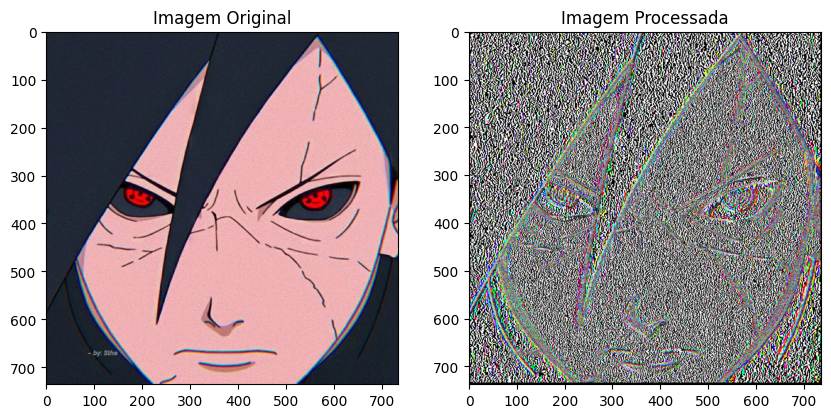

In [10]:
# Questão 1

# filtro = np.ones((3, 3)) / 9 # Filtro de média
filtro = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]) # Filtro de Sobel horizontal
# filtro = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]) # Filtro de Sobel vertical
# filtro = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]) # Filtro de realce
# filtro = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16 # Filtro de Gauss


imagem = mpimg.imread('madara_icone.jpg')

imagem_processada = convulacao(imagem, filtro, borda='espelho')

# Mostrar a imagem original e a imagem suavizada
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1, 2, 2)
plt.imshow(imagem_processada, cmap='gray')
plt.title('Imagem Processada')
plt.show()

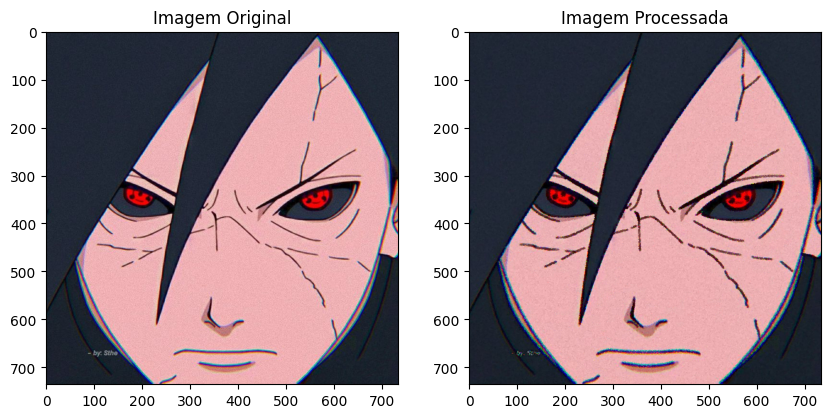

In [13]:
#Questão 2
imagem = mpimg.imread('madara_icone.jpg')

# imagem_processada = filtro_mediana(imagem, (3, 3))
imagem_processada = filtro_moda(imagem, (3, 3))
# imagem_processada = filtro_maximo(imagem, (3, 3))
# imagem_processada = filtro_minimo(imagem, (3, 3))

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1, 2, 2)
plt.imshow(imagem_processada, cmap='gray')
plt.title('Imagem Processada')
plt.show()

3 3


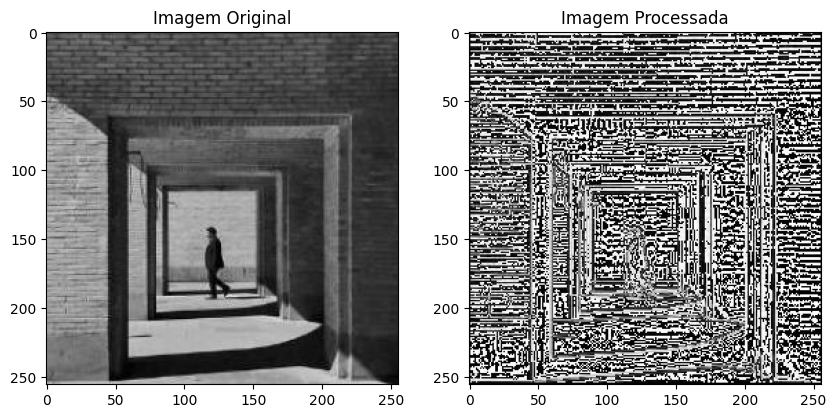

In [14]:
# Questão 3
filtro = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]) # Filtro de Laplace

# imagem = mpimg.imread('imagem_cinza.png')
imagem = mpimg.imread('TESTE.jpg')

imagem_processada = convulacao(imagem, filtro, borda='ignore')

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')
plt.subplot(1, 2, 2)
plt.imshow(imagem_processada, cmap='gray')
plt.title('Imagem Processada')
plt.show()

3 3
[[0.5 0.5 0.5]
 [0.5 0.5 0.5]
 [0.5 0.5 0.5]]
3 3
3 3
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
3 3
3 3
[[1.5 1.5 1.5]
 [1.5 1.5 1.5]
 [1.5 1.5 1.5]]
3 3


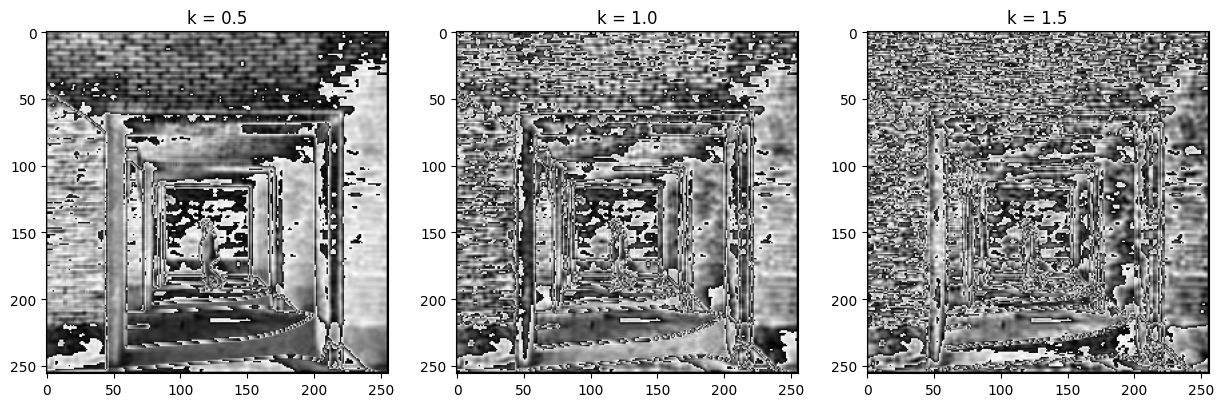

In [15]:
# Questão 4
# Diferentes valores de k (0 < k < 2)
valores_k = [0.5, 1.0, 1.5]

# Carregar a imagem
# imagem = mpimg.imread('madara_icone.jpg')
imagem = mpimg.imread('TESTE.jpg')

# Aplicar a filtragem high-boost para diferentes valores de k
plt.figure(figsize=(15, 5))
for i, k in enumerate(valores_k, 1):
    # Garantir que o filtro high-boost tenha um número ímpar de linhas e colunas
    filtro_high_boost = k * np.ones((3, 3), dtype=float)  # Você pode ajustar o tamanho conforme necessário
    
    # Calcular a imagem suavizada (usando a própria imagem como suavizada)
    imagem_suavizada = convulacao(imagem=imagem, filtro=filtro, borda='ignore')
    
    # Atualizar o filtro high-boost para garantir um número ímpar de linhas e colunas
    filtro_high_boost = k * np.ones((3, 3), dtype=float)  # Você pode ajustar o tamanho conforme necessário
    
    print(filtro_high_boost)

    
    # Aplicar a convolução com o filtro high-boost
    imagem_high_boost = convulacao(imagem=imagem, filtro=filtro_high_boost, borda='ignore')
    
    # Mostrar a imagem processada para o valor de k atual
    plt.subplot(1, len(valores_k), i)
    plt.imshow(imagem_high_boost, cmap='gray')
    plt.title(f'k = {k}')

plt.show()


C:\Users\Jaum Netu\AppData\Local\Temp\ipykernel_11112\3782517564.py:13: FutureWarning: `seed` is a deprecated argument name for `random_noise`. It will be removed in version 0.23. Please use `rng` instead.
  imagem_com_ruido = random_noise(imagem, mode='gaussian', seed=None, clip=True)


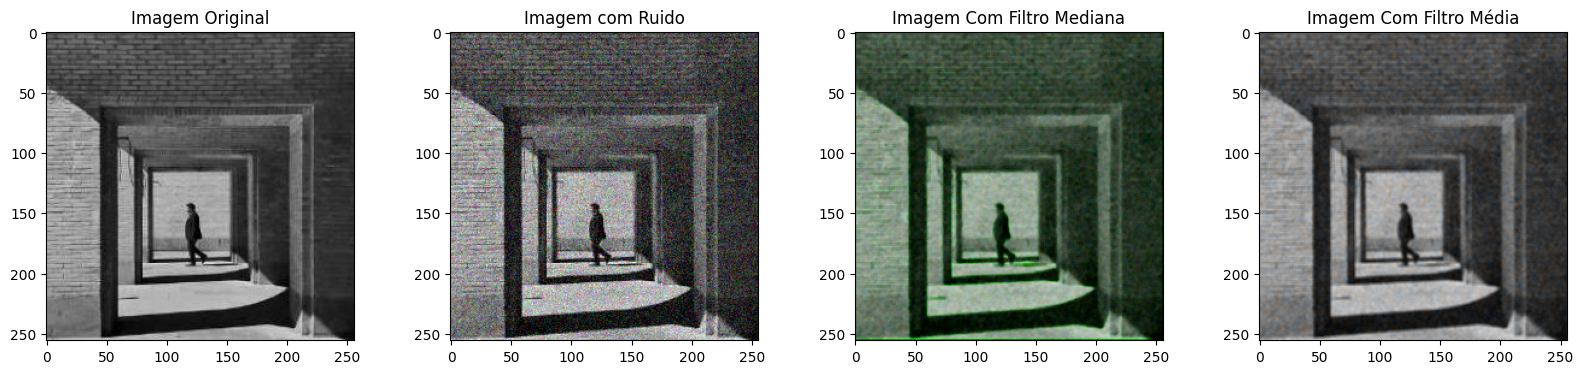

In [16]:
# Questão 5

# imagem = mpimg.imread('imagem_cinza.png')
# imagem = mpimg.imread('madara_icone.jpg')
imagem = mpimg.imread('TESTE.jpg')

# Nossas funções
# imagem_com_ruido = adiciona_ruido(imagem, desvio_padrao=0.1)
# imagem_com_filtro_mediana = filtro_mediana(imagem_com_ruido, (3, 3))
# imagem_com_filtro_media = filtro_media(imagem_com_ruido, (3, 3))

# Funções prontas
imagem_com_ruido = random_noise(imagem, mode='gaussian', seed=None, clip=True)

tamanho_janela = 3
imagem_com_filtro_mediana = medfilt(imagem_com_ruido, kernel_size=tamanho_janela)

imagem_com_filtro_media = uniform_filter(imagem_com_ruido, size=tamanho_janela)

plt.figure(figsize=(20, 4))

plt.subplot(1, 4, 1)
plt.imshow(imagem, cmap='gray')
plt.title('Imagem Original')

plt.subplot(1, 4, 2)
plt.imshow(imagem_com_ruido, cmap='gray')
plt.title('Imagem com Ruido')

plt.subplot(1, 4, 3)
plt.imshow(imagem_com_filtro_mediana, cmap='gray')
plt.title('Imagem Com Filtro Mediana')

plt.subplot(1, 4, 4)
plt.imshow(imagem_com_filtro_media, cmap='gray')
plt.title('Imagem Com Filtro Média')

plt.show()